# Neutrino Trident Production

This notebook generates, loads, and tests the MC events for neutrino trident production off nuclei and protons,

$$\nu_\alpha \,+\, N \,\to\, \nu_\beta \,+\, \ell^+_{\kappa} \,+\, \ell^-_{\gamma} \,+\, N.$$

It can be easily adapted to new experimental definitions in exp_classes.py.

Note that only the four-momenta of the final state charged leptons and neutrino are provided, together with the neutrino energy $E_\nu$ and the momentum transfer to the nuclear targer $Q^2$.

This work is directly based on $\textit{arXiv:1807.10973}$.

## Init

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import numpy as np
from scipy import *
import os
import sys
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import matplotlib.lines as mlines
from matplotlib.pyplot import *


# Neutrino Trident Production

from source import *
from source.exp_classes import *

## Generate trident events @ experiments defined in exp_classes


In [6]:
from source.exp_classes import *
exps.set_new_physics_for_all(0.0,0.0,0.1)

N=1e5
MINOS_LE_FHC.run_MC(nevents=N, verbose=1)

Total samples imported:  840000
Succesfully obtained events for MINOS_LE_FHC.


In [18]:
# set new physics parameters for the 7 setups below at once
from source.exp_classes import *
exps.set_new_physics_for_all(0.0,0.0,0.1)

N=1e5
MINOS_LE_FHC.run_MC(nevents=N, verbose=1)
MINOS_LE_RHC.run_MC(nevents=N, verbose=1)
MINOS_ME_FHC.run_MC(nevents=N, verbose=1)

NOVA_FHC.run_MC(nevents=N, verbose=1)
NOVA_RHC.run_MC(nevents=N, verbose=1)

ND280_FHC.run_MC(nevents=N, verbose=1)
ND280_RHC.run_MC(nevents=N, verbose=1)

Total samples imported:  840000
Succesfully obtained events for MINOS_LE_FHC.
Total samples imported:  840000
Succesfully obtained events for MINOS_LE_RHC.
Total samples imported:  420000
Succesfully obtained events for MINOS_ME_FHC.
Total samples imported:  1470000
Succesfully obtained events for NOVA_FHC.
Total samples imported:  1470000
Succesfully obtained events for NOVA_RHC.
Total samples imported:  1680000
Succesfully obtained events for ND280_FHC.
Total samples imported:  1680000
Succesfully obtained events for ND280_RHC.


## Compute number of events with correct normalization

In [54]:
print(f"# of events @ MINOS_LE_FHC = {MINOS_LE_FHC.get_number_events():.2f}")
print(f"# of events @ MINOS_LE_RHC = {MINOS_LE_RHC.get_number_events():.2f}")
print(f"# of events @ MINOS_ME_FHC = {MINOS_ME_FHC.get_number_events():.2f}")

print(f"# of events @ NOVA_FHC = {NOVA_FHC.get_number_events():.2f}")
print(f"# of events @ NOVA_RHC = {NOVA_RHC.get_number_events():.2f}")

print(f"# of events @ ND280_FHC = {ND280_FHC.get_number_events():.2f}")
print(f"# of events @ ND280_RHC = {ND280_RHC.get_number_events():.2f}")

# of events @ MINOS_LE_FHC = 1590.58
# of events @ MINOS_LE_RHC = 556.01
# of events @ MINOS_ME_FHC = 3643.02
# of events @ NOVA_FHC = 590.25
# of events @ NOVA_RHC = 361.79
# of events @ ND280_FHC = 26.15
# of events @ ND280_RHC = 19.69


# Class of kinematics

## Events as a function of true neutrino energy 

High neutrino energies contribute significantly due to the rise of the cross section

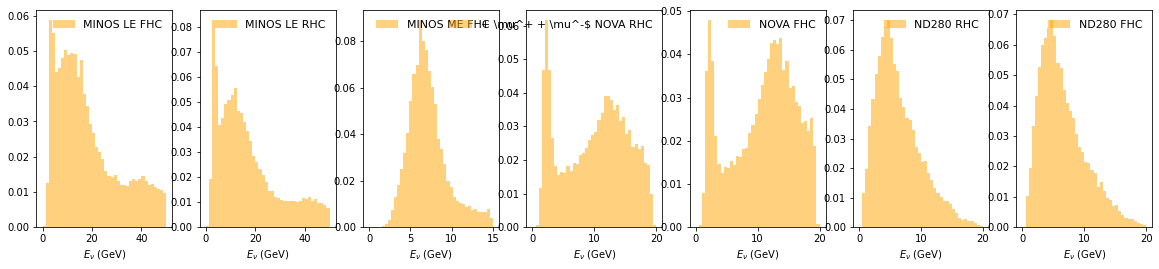

In [53]:
# plot the distribution in neutrino energy as a sanity check
def plot_nuflux(ax, colour, MC, title):
    # defs
    kwargs = {"facecolor" : colour, 
              "edgecolor" : colour,
              "lw"        : 0.0,
              "alpha"     : 0.5,
              "weights" : MC.w/np.sum(MC.w),
              "bins" : 40,
              "density" : False,
              "label" : title} 
    
    # hists
    h = ax.hist(MC.Enu, range=(0.0,MC.Enu_max), **kwargs)
    ax.set_xlabel(r"$E_\nu$ (GeV)")
#     ax.set_yticks([])
    ax.legend(loc="upper right", frameon=False, fontsize=11)

fig,  axes = plt.subplots(nrows=1, ncols=7,figsize = (20,4))


plot_nuflux(axes[0],"orange", MINOS_LE_FHC.kin, 
           r"MINOS LE FHC")

plot_nuflux(axes[1],"orange", MINOS_LE_RHC.kin, 
           r"MINOS LE RHC")

plot_nuflux(axes[2],"orange", MINOS_ME_FHC.kin, 
           r"MINOS ME FHC")

plot_nuflux(axes[3],"orange", NOVA_RHC.kin, 
           r"+ \mu^+ + \mu^-$ NOVA RHC")

plot_nuflux(axes[4],"orange", NOVA_FHC.kin, 
           r"NOVA FHC")


plot_nuflux(axes[5],"orange", ND280_RHC.kin, 
           r"ND280 RHC")

plot_nuflux(axes[6],"orange", ND280_FHC.kin, 
           r"ND280 FHC")

# for ax in axes:


# Check a set of kinematical distributions


In [61]:
MINOS_LE_FHC.kin.only_coh

array([False, False, False, ..., False, False, False])

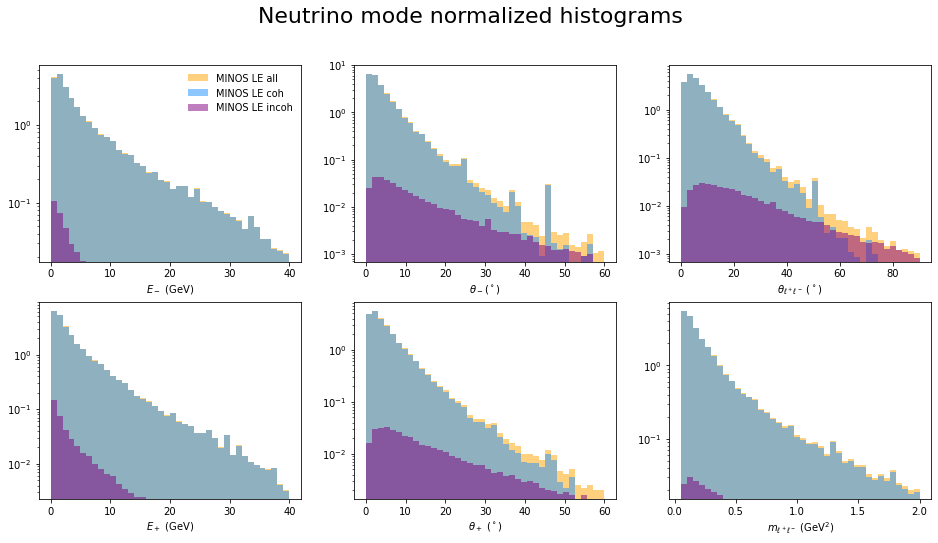

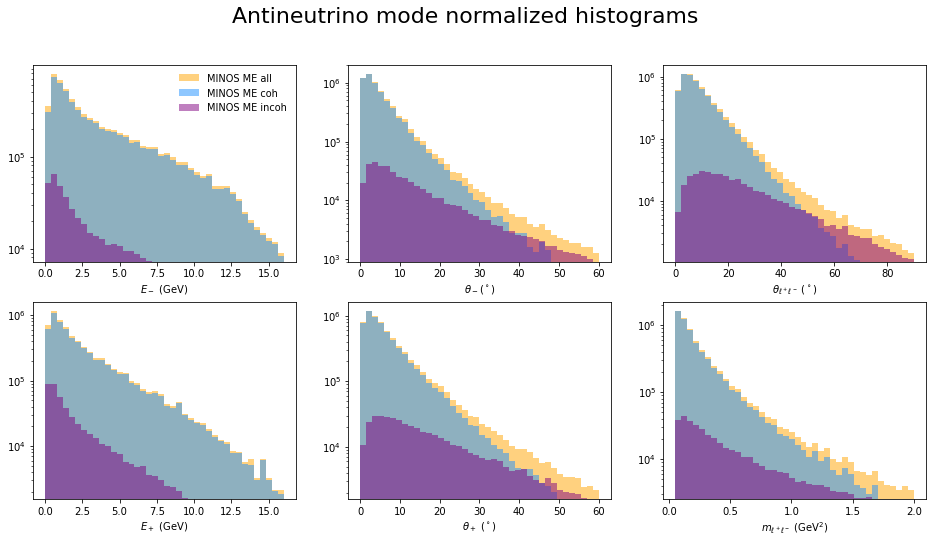

In [84]:
fsize = 14

# figs
fig1,  axes1 = plt.subplots(nrows=2, ncols=3,figsize = (16,8))
fig2,  axes2 = plt.subplots(nrows=2, ncols=3,figsize = (16,8))

def bin_center(bins):
    return (bins[:-1]-bins[:1])/2

def plot_dists(MC, colour, title, axes, mask):

    ((ax1, ax2, ax3), (ax4, ax5, ax6)) = axes

    # defs
    kwargs = {"facecolor" : colour, 
              "edgecolor" : colour,
              "lw"        : 0.0,
              "alpha"     : 0.5,
              "weights" : MC.w[mask],
              "bins" : 40,
              "density" : False,
              "label"  : title} 
    
    # hists
    h = ax1.hist(MC.Eminus(mask), range=(0,MC.Enu_max*0.8), **kwargs)
#     print(np.shape(h))
#     ax.errorbar(h[0],)
    ax1.set_xlabel(r"$E_-$ (GeV)")

    h = ax2.hist(MC.minus_beam(mask)*const.rad_to_deg, range=(0,60), **kwargs)
    ax2.set_xlabel(r"$\theta_-(^\circ$)")

    h = ax3.hist(MC.sepangle(mask)*const.rad_to_deg, range=(0,90), **kwargs)
    ax3.set_xlabel(r"$\theta_{\ell^+ \ell^-}$ ($^\circ$)")
    
    h = ax4.hist(MC.Eplus(mask), range=(0,MC.Enu_max*0.8), **kwargs)
    ax4.set_xlabel(r"$E_+$ (GeV)")

    h = ax5.hist(MC.plus_beam(mask)*const.rad_to_deg, range=(0,60), **kwargs)
    ax5.set_xlabel(r"$\theta_+$ ($^\circ$)")

    h = ax6.hist(MC.invmassSQR(mask), range=((MC.mm+MC.mp)**2,2.0), **kwargs)    
    ax6.set_xlabel(r"$m_{\ell^+\ell^-}$ (GeV$^2$)")
    
    for ax in axes.flatten():
        ax.set_yscale('log')
        ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1]*1)


########################################
# neutrino

fig1.suptitle("Neutrino mode normalized histograms", fontsize=22)
plot_dists(MINOS_LE_FHC.kin,'orange', 
             r"MINOS LE all", axes1, mask=MINOS_LE_FHC.kin.all_events)
plot_dists(MINOS_LE_FHC.kin,'dodgerblue', 
             r"MINOS LE coh", axes1, mask=MINOS_LE_FHC.kin.only_coh)
plot_dists(MINOS_LE_FHC.kin,'purple', 
             r"MINOS LE incoh", axes1, mask=MINOS_LE_FHC.kin.only_incoh)

axes1[0,0].legend(loc='upper right', frameon=False, fontsize=0.7*fsize)


fig2.suptitle("Antineutrino mode normalized histograms", fontsize=22)

case2=NOVA_FHC.kin
plot_dists(case2,'orange', 
             r"MINOS ME all", axes2, mask=case2.all_events)
plot_dists(case2,'dodgerblue', 
             r"MINOS ME coh", axes2, mask=case2.only_coh)
plot_dists(case2,'purple', 
             r"MINOS ME incoh", axes2, mask=case2.only_incoh)

axes2[0,0].legend(loc='upper right', frameon=False, fontsize=0.7*fsize)

# Some interesting properties of trident events:

Text(0.5, 20.799999999999997, '$E_-$ (GeV)')

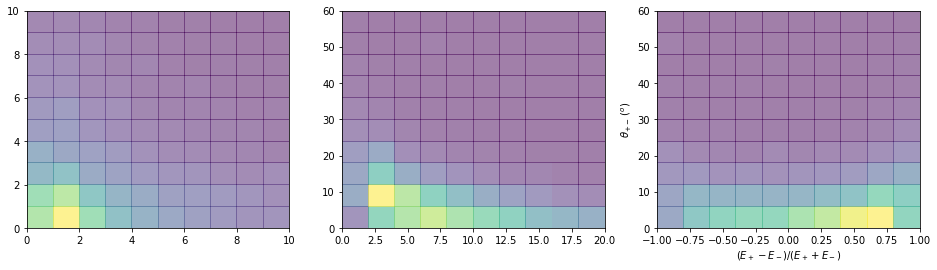

In [130]:

fsize = 14

fig1,  axes = plt.subplots(nrows=1, ncols=3,figsize = (16,4))
# fig1.suptitle("", fontsize=22)

# hists
MC=MINOS_LE_FHC.kin
mask=...
# defs
kwargs = {"facecolor" : 'dodgerblue', 
          "edgecolor" : 'dodgerblue',
          "lw"        : 0.0,
          "alpha"     : 0.5,
          "weights" : MC.w[mask],
          "bins" : 10,
          "density" : False,
          "label"  : title} 
# h = axes[0].hist(MC.Eminus(mask), range=(0,MC.Enu_max*0.8), **kwargs)
h = axes[0].hist2d(MC.Eminus(mask),MC.Eplus(mask), range=((0,MC.Enu_max*0.2),(0,MC.Enu_max*0.2)), cmap='viridis',**kwargs)
h = axes[1].hist2d(MC.Eminus(mask)+MC.Eplus(mask),MC.sepangle(mask)*const.rad_to_deg, range=((0,MC.Enu_max*0.4),(0,60)), cmap='viridis',**kwargs)
h = axes[2].hist2d((MC.Eminus(mask)-MC.Eplus(mask))/(MC.Eminus(mask)+MC.Eplus(mask)),MC.sepangle(mask)*const.rad_to_deg, range=((-1,1),(0,60)), cmap='viridis',**kwargs)
axes[2].set_xlabel(r'$(E_+-E_-)/(E_+ + E_-)$')
axes[2].set_ylabel(r'$\theta_{+-}\,(^o)$')

ax1.set_xlabel(r"$E_-$ (GeV)")


## Some trivial check of the numerics

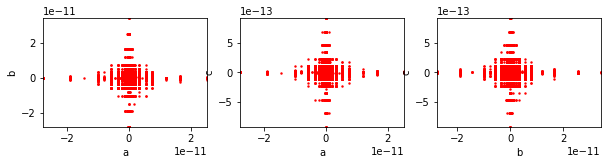

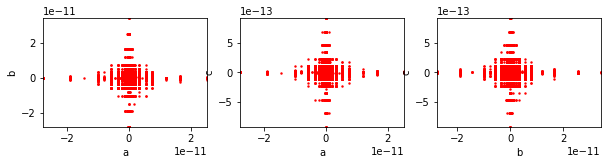

In [70]:
# Test the different kinematical limits
# charged lepton masses are recovered
def check_masses(MC):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize = (10,2))
    # charged lepton masses are recovered
    mplus  = np.sqrt(Cfv.dot4(MC.Pplus, MC.Pplus))
    mminus = np.sqrt(Cfv.dot4(MC.Pminus, MC.Pminus))
    mnu = Cfv.dot4(MC.Pnu, MC.Pnu)
    
    a = mplus/MC.mp - 1.
    b = mminus/MC.mm - 1.
    c = mnu
#     a = MC.mp
#     b = MC.mm

    ax1.set_xlim(np.min(a), np.max(a)), ax1.set_ylim(np.min(b), np.max(b))
    ax2.set_xlim(np.min(a), np.max(a)), ax2.set_ylim(np.min(c), np.max(c))
    ax3.set_xlim(np.min(b), np.max(b)), ax3.set_ylim(np.min(c), np.max(c))
    ax1.set_xlabel('a'), ax1.set_ylabel('b')
    ax2.set_xlabel('a'), ax2.set_ylabel('c')
    ax3.set_xlabel('b'), ax3.set_ylabel('c')
    
    ax1.scatter(a,b, lw=0, s=6,c="r")
    ax2.scatter(a,c, lw=0, s=6,c="r")
    ax3.scatter(b,c, lw=0, s=6,c="r")

    
check_masses(MINOS_LE_FHC.kin)
check_masses(MINOS_LE_FHC.kin)